Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Задание функций, градиентов и гессионов

f = $x^2 + y^2 + z^2$ (минимум в 0)

g = $x^3 + y^3 - 3xy$  (минимума нет)

check_fun = $-2x_0^3 + 4x_0^2 + x_1^4 - 3x_1^2 + 2x_2^2 * x_1 - 5x_2 + x_3^4 - x_3^2 * x_0^2 - 10$ (минимума нет)

fun4 = $(x_0+3)^4 + (x_1-1)^2 + (x_2-2)^2 + (x_3+x_0)^2$ (минимум = 0 в точке (-3, 1, 2, 3))

In [2]:
def f(x):
    x,y,z = x
    return x**2 + y**2 + z**2

def grad_f(x):
    x,y,z = x
    return np.array([2*x, 2*y, 2*z])

def hessian_f(x):
    x,y,z = x
    return np.array([[2, 0, 0],
                    [0, 2, 0],
                    [0, 0, 2]])

def g(x):
    x, y = x
    return x**3 + y**3 - 3*x*y

def grad_g(x):
    x, y = x
    return np.array([3*x**2 - 3*y, 3*y**2 - 3*x])

def hessian_g(x):
    x, y = x
    return np.array([[6*x, -3],
                    [-3, 6*y]])

def check_fun(x):
    return -2*x[0]**3 + 4*x[0]**2 + x[1]**4 - 3*x[1]**2 + 2*x[2]**2 * x[1] - 5*x[2] + x[3]**4 - x[3]**2 * x[0]**2 - 10
def grad_check_fun(x):
    return np.array([-6*x[0]**2 + 8*x[0] - 2*x[3]**2 * x[0],
            4*x[1]**3 - 6*x[1] + 2*x[2]**2,
            4*x[2] * x[1] - 5,
            4*x[3]**3 - 2*x[3] * x[0]**2])
def hessian_check_fun(x):
    return np.array([[-12*x[0] + 8 - 2*x[3]**2, 0, 0, -4*x[3]*x[0]],
            [0, 12*x[1]**2 - 6, 4*x[2], 0],
            [0, 4*x[2], 4*x[1], 0],
            [-4*x[3]*x[0], 0, 0, 12*x[3]**2 - 2*x[0]**2]])

def fun4(x):
    x0, x1, x2, x3 = x
    return (x0+3)**4 + (x1-1)**2 + (x2-2)**2 + (x3+x0)**2
def grad_fun4(x):
    x0, x1, x2, x3 = x
    return [4*(x0+3)**3 + 2*(x3+x0),
            2*(x1-1), 2*(x2-2), 2*(x3+x0)]
def hessian_fun4(x):
    x0, x1, x2, x3 = x
    return [[12*(x0+3)**2 + 2,0,0,2],
            [0,2,0,0], [0,0,2,0], [2,0,0,2]]

#Проверка на выпуклость

Метод сопряенных градиентов применим только для выпуклых функций, поэтому сначала надо проверить на выпуклость

In [3]:
def check_convexity(func, grad_func, hessian_func, x_range):
    for x in x_range:
        H = hessian_func(x)
        eigenvalues = np.linalg.eigvals(H)
        if not np.all(eigenvalues >= 0):
            return False
    return True

In [4]:
x = np.linspace(-10, 10, 10)

# Проверка выпуклости f(x, y, z)
x_range = np.array(np.meshgrid(x, x, x)).T.reshape(-1, 3)
is_convex = check_convexity(f, grad_f, hessian_f, x_range)
print(f"f(x, y, z) выпуклая: {is_convex}")

# Проверка выпуклости g(x, y)
y_range = np.array(np.meshgrid(x, x)).T.reshape(-1, 2)
is_convex = check_convexity(g, grad_g, hessian_g, y_range)
print(f"g(x, y) выпуклая: {is_convex}")

#Проверка выпуклости check_fun(x,x,x,x)
check_x_range = np.array(np.meshgrid(x, x, x, x)).T.reshape(-1, 4)
is_convex = check_convexity(check_fun, grad_check_fun, hessian_check_fun, check_x_range)
print(f"check_fun(x, y, z, k) выпуклая: {is_convex}")

#Проверка выпуклости fun4(x,x,x,x)
fun4_x_range = np.array(np.meshgrid(x, x, x, x)).T.reshape(-1, 4)
is_convex = check_convexity(fun4, grad_fun4, hessian_fun4, fun4_x_range)
print(f"fun4(x, y, z, k) выпуклая: {is_convex}")

f(x, y, z) выпуклая: True
g(x, y) выпуклая: False
check_fun(x, y, z, k) выпуклая: False
fun4(x, y, z, k) выпуклая: True


# Реализация действий с матрицами

In [5]:
# перемножение числа и вектора
def mult(a, arr):
    return np.array([i*a for i in arr])

# сложение двух векторов
def add(arr1, arr2):
    try:
        return np.array([arr1[i]+arr2[i] for i in range(len(arr1))])
    except TypeError:
        arr1+arr2[0]

# Скалярное произведение
def mydot(arr1, arr2):
    try:
        ans=0
        for i in range(len(arr1)):
            ans+=arr1[i]*arr2[i]
        return ans
    except:
        return arr1*arr2[0]

# Реализация метода сопряженных градиентов

In [6]:
def conjugate_gradient5(f, grad_f, x0, tol=1e-6, max_iter=200, alpha_max=1.0, c=0.5, rho=0.5, alpha_min=1e-8):
    """
    Метод сопряженных градиентов с backtracking line search.

    Args:
    f: Функция, для которой нужно найти минимум.
    grad_f: Градиент функции.
    x0: Начальная точка поиска.
    tol: Допустимая погрешность.
    max_iter: Максимальное количество итераций.
    alpha_max: Максимальная длина шага.
    c: Параметр для backtracking line search.
    rho: Параметр для backtracking line search.
    alpha_min: Минимальная длина шага.

    Returns:
    Кортеж (x_min, f_min, arr_f), где x_min - точка минимума, f_min - значение функции в минимуме, arr_f - история значений функции.
    """
    arr_f = [f(x0)]
    x = x0
    r = mult(-1, grad_f(x))
    d = r

    for i in range(max_iter):
        alpha = alpha_max
        # Продвинутый поиск по линии с обратным шагом
        while f(add(x, mult(alpha, d))) > f(x) + c * alpha * mydot(grad_f(x), d) and alpha > alpha_min:
            alpha *= rho

        if alpha < alpha_min:  # Если шаг слишком мал, прерываем
            break

        x = add(x, mult(alpha, d))
        arr_f.append(f(x))
        r_new = mult(-1, grad_f(x))
        beta = mydot(r_new, r_new) / mydot(r, r)
        d = add(r_new, mult(beta, d))
        r = r_new

        # Проверка условия сходимости
        if np.linalg.norm(r) < tol:
            break

    f_min = f(x)
    return x, f_min, arr_f

#Применение метода сопряженных градиентов

In [7]:
# Начальные точки
x0_1 = [1, 1, 6]
x0_2 = [8, -2]
check_x_0 = [-1,-1,-1,-1]
fun4_x0 = [-1,0.5,0.5,0.5]

In [ ]:
x_min1, f_min1, arr_f1 = conjugate_gradient5(f, grad_f, x0_1)
x_min2, f_min2, arr_f2 = conjugate_gradient5(g, grad_g, x0_2)
check_x_min, check_f_min, check_arr_f = conjugate_gradient5(check_fun, grad_check_fun, check_x_0)
fun4_x_min, fun4_f_min, fun4_arr_f = conjugate_gradient5(fun4, grad_fun4, fun4_x0)

In [9]:
def to_float(value):
    try:
      arr = []
      for i in value:
        arr.append("{:.2f}".format(i))
      return arr
    except:
      return "{:.2f}".format(value)

print(f"x_min1: {to_float(x_min1)}, f_min1: {to_float(f_min1)} за {len(arr_f1)} итераций")
print(f"x_min2: {to_float(x_min2)}, f_min1: {to_float(f_min2)} за {len(arr_f2)} итераций")
print(f"check_x_min: {to_float(check_x_min)}, check_f_min: {to_float(check_f_min)} за {len(check_arr_f)} итераций")
print(f"fun4_x_min: {to_float(fun4_x_min)}, fun4_f_min: {to_float(fun4_f_min)} за {len(fun4_arr_f)} итераций")

x_min1: ['0.00', '0.00', '0.00'], f_min1: 0.00 за 2 итераций
x_min2: ['nan', 'nan'], f_min1: nan за 201 итераций
check_x_min: ['nan', 'nan', 'nan', 'nan'], check_f_min: nan за 201 итераций
fun4_x_min: ['-3.00', '1.00', '2.00', '3.00'], fun4_f_min: 0.00 за 138 итераций


Как мы видим, из-за того, что вторая и третья функции не выпуклые, то метод не смог найти для них точку минимума

#Графики

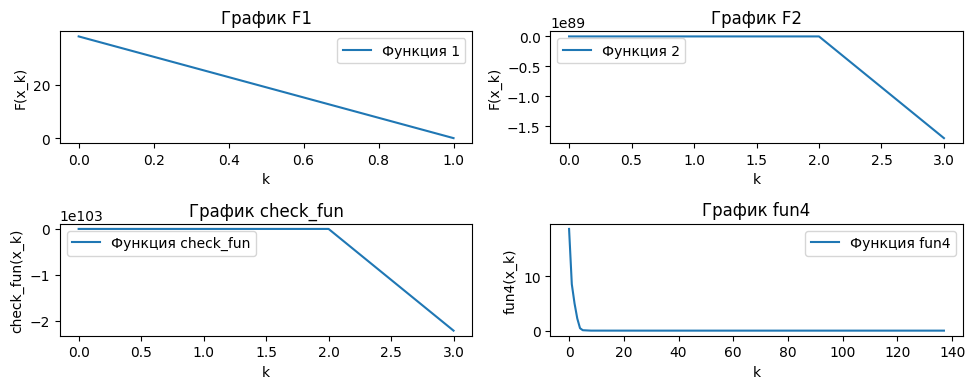

In [13]:
import matplotlib.pyplot as plt

# Создаем фигуру и оси для трех графиков
fig, axs = plt.subplots(2, 2, figsize=(10, 4))  # 1 строка, 3 колонки

# График 1
axs[0][0].plot(range(len(arr_f1)), arr_f1, label="Функция 1")
axs[0][0].set_xlabel("k")
axs[0][0].set_ylabel("F(x_k)")
axs[0][0].set_title("График F1")
axs[0][0].legend()

# График 2
axs[0][1].plot(range(len(arr_f2)), arr_f2, label="Функция 2")
axs[0][1].set_xlabel("k")
axs[0][1].set_ylabel("F(x_k)")
axs[0][1].set_title("График F2")
axs[0][1].legend()

# График 3
axs[1][0].plot(range(len(check_arr_f)), check_arr_f, label="Функция check_fun")
axs[1][0].set_xlabel("k")
axs[1][0].set_ylabel("check_fun(x_k)")
axs[1][0].set_title("График check_fun")
axs[1][0].legend()

# График 4
axs[1][1].plot(range(len(fun4_arr_f)), fun4_arr_f, label="Функция fun4")
axs[1][1].set_xlabel("k")
axs[1][1].set_ylabel("fun4(x_k)")
axs[1][1].set_title("График fun4")
axs[1][1].legend()

# Показываем графики
plt.tight_layout()  # Для улучшения расположения графиков
plt.show()

Аналогично: первая функция нашла свой минимум за 2 итерации, 2-я не нашла минимум корректно (значения после 3-й итерации = nan, что не отображено на графике), 3-я тоже ничего не нашла на третьей итерации став = nan, а вот 4-я за 138 итераций вполне успешно нашла минимум